here is an excerpt from Ian Stewart's Galois Theory Chapter 1, Exercise 11


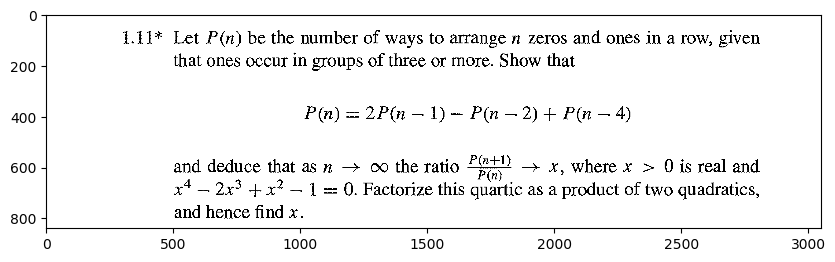

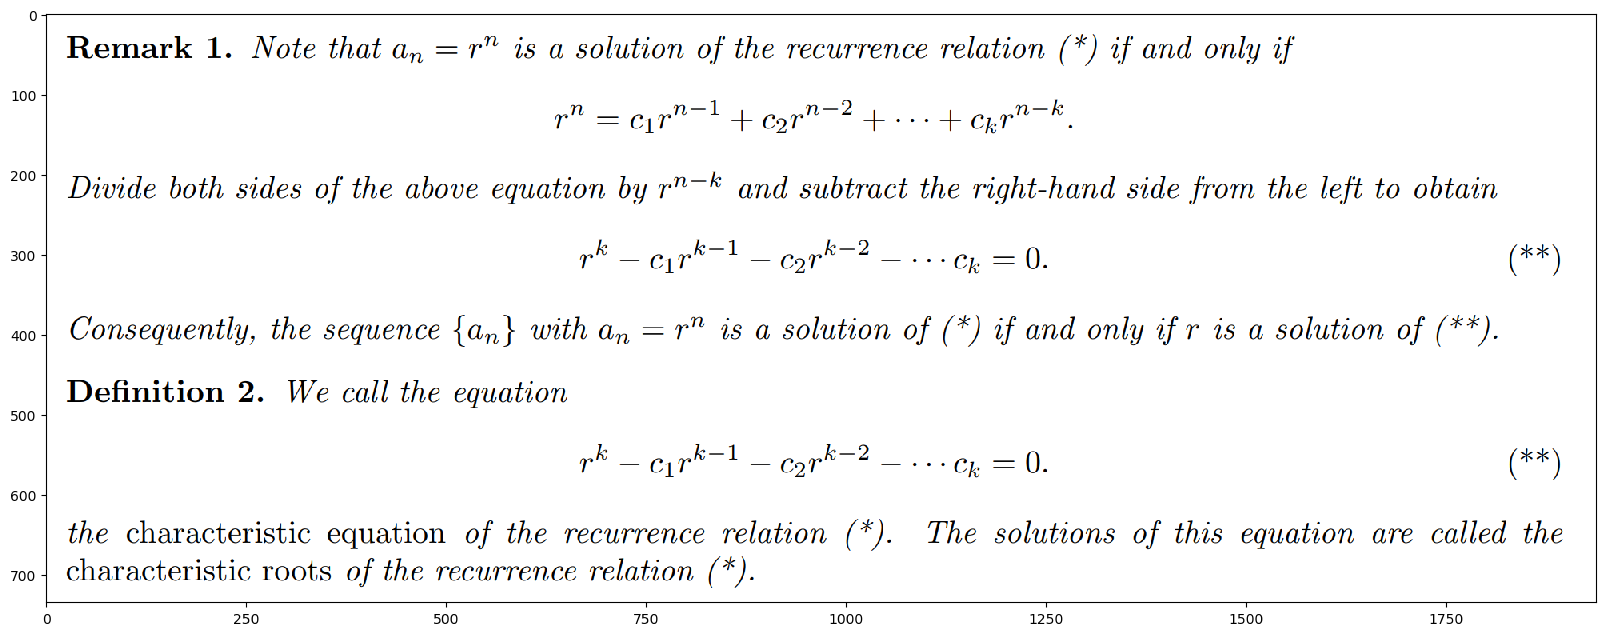

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from matplotlib.pyplot import figure

img = mpimg.imread("GthChap1Exercice11.PNG")
figS=10
print "here is an excerpt from Ian Stewart's Galois Theory Chapter 1, Exercise 11"
figure(num=None, figsize=(figS, 3*figS), dpi=100, facecolor='w', edgecolor='k')
imgplot = plt.imshow(img)

img = mpimg.imread("GthChap1Exercice11-1.PNG")
figS=20
figure(num=None, figsize=(figS, 3*figS), dpi=100, facecolor='w', edgecolor='k')
imgplot = plt.imshow(img)

In [1]:
p=3
Nmax=2+p^2


# Ian Stewart Formula, ok for p=x
def IanS(n,p):
    if n<=2*p:
# first formula below count the words with all sequences of contiguous >=p bits 
# also count if all zero no duplicates possible
# count all sequences in word n when ones sequences >=p or  all zero
# example :
#0000  n=4 p=3 2+1+1 =(n-p+1)/2 *(n-p+2) +1 =4
#1110
#0111
#1111   
        return (n-p+1)/2 *(n-p+2) +1       
    else:
# Ian Stewart formula below  
        return 2*IanS(n-1,p) - IanS(n-2,p) + IanS(n-p-1,p)

sIanTab=[]
nTab=[]
for n in range (p,Nmax):
    sIanTab.append(IanS(n,p))
    nTab.append(n)

print(' Ian Stewart Calculation, all ones packets >= '+str(p)+' in the word n or all zeros')
show(" ones packets >= "+str(p)+" List : " ,sIanTab)
show(" word of length n List  : ",nTab)

        


" below this recurrence relation is automaticaly build \
 it expresses the number of sequences of >= to p '1' consecutive plus 1 (the sequence all the bits to zero) "
if p>2 :
    zeroSeq='+ 0*a_{n-'+str(2)+'} '
    for i in (3..(p-1)) :
        zeroSeq=zeroSeq + '+ 0*a_{n-'+str(i)+'} '
    show(zeroSeq)
else :
    zeroSeq=''

recurrenceEq='1*a_{n+1} = 2*a_{n+0} -1*a_{n-1} '+ zeroSeq + '+1*a_{n-'+str(p)+'}'

# you can write below your own recurrence relation (one blank between each term)
#recurrenceEq='1*a_{n+1} = 2*a_{n+0} -1*a_{n-1} +0*a_{n-2} +1*a_{n-3}'

" example : below, in a number of n bits length.(all ones packets >= 3 in the word n or all zeros) "
#recurrenceEq='1*a_{n+1} = 2*a_{n+0} -1*a_{n-1} +0*a_{n-2} +1*a_{n-3}'

# example for Fibonaci sequence, uncomment the 2 lines below
#recurrenceEq='1*a_{n+1} = 1*a_{n+0} +1*a_{n-1} '
#sIanTab=[1,1]

show(recurrenceEq)

show(LatexExpr(r"\text{Your recurrence EQ : } "+recurrenceEq+" ")) 
nL=[]
import re
nL=re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", recurrenceEq)
show("nL : ",nL)
eQfactors=[]
eQexponants=[]
for i in range(0,len(nL)) :
    if (i % 2) == 0:
        eQfactors.append(Integer(float(nL[i])))
    else :
        eQexponants.append(Integer(-float(nL[i])+1))

"reverse coeff list in order to put the progression factors in the same direction \
 as the progression of the polynomial with the variable n :\
like the serie [n^0, n^1 , n^2 .....]"
eQfactors.reverse()

" the -1 multiplication is present only for displaying the rhs  polynomial in usual lhs way"
" stop to -2 because it does not apply to a_n which is already with good  lhs signe"
fnL=[]
mR=len(eQfactors)-1
for i in (0..mR-1):
    eQfactors[i]= -eQfactors[i]
    fnL.append(Integer(Integer(-eQfactors[i])))
show("fnL : ",fnL)
#eQfactors[len(eQfactors)-1]=eQfactors[len(eQfactors)-1]
show("Eq factors List : ",eQfactors)
show("Eq Exponants List : ",eQexponants) 
#R = PolynomialRing(QQ, 'x')
print " caracteristic polynomial p(x)"
var('x')
x = PolynomialRing(SR, 'x').gen()
p_x=0
for i in (0..(len(eQfactors)-1)):
    p_x=p_x+eQfactors[i]*x^(eQexponants[i])
show("p(x) : ",p_x)
p_xRootsTuple=p_x.roots()
p_xRootsL=[]
index=0
indexT=0
# expanding the roots tuples (if multiple roots)
for t in p_xRootsTuple:
    for r in range(0,t[1]) :
        p_xRootsL.append(t[0])
        index+=1
        show("root ",str(index)," : ",p_xRootsTuple[indexT][0])
        #show("root simplified",str(index)," : ",(LatexExpr(latex((p_xRootsTuple[indexT][0])._sympy_().simplify()))))
    indexT+=1


# Build the matrix M by replacing a_00 by its equation
startSeqL=(sIanTab[0:eQexponants[-1]])[::-1]
show("start Seq : ",startSeqL)
startSeqM=matrix(SR,startSeqL).transpose()

aL=[fnL[::-1]] # fnl reversed to get the most significant digit up
sr=([1]+[0]*(mR-1))
for r in range(0,mR-1) :
    aL.append(sr)
    sr=sr[-1:]+sr[:-1] # shift right
A=matrix(QQ,aL)
show("start Seq matrix: ",startSeqM)
show(" A : ",A)




var('lambd')
lambd = PolynomialRing(SR, 'lambd').gen()
IM = identity_matrix(SR, A.dimensions()[0]);
AIM=(A-lambd*IM)
lambdaListTuple=(AIM.determinant()).roots()
lambdaList=[]
for t in lambdaListTuple:
    for r in range(0,t[1]) :
        lambdaList.append(t[0])
for e in lambdaList:
    e=e._sympy_().simplify()
show(" lambda List  : ",lambdaList)

A_lambdaI_list=[]
for l in lambdaList :
    A_lambdaI_list.append(A-l*IM)


"An interval is represented as a pair of floating-point numbers a and b (where a≤b)\
and is printed as a standard floating-point number with a question mark (for instance, 3.1416?).\
The question mark indicates that the preceding digit may have an error of ±1. \
These floating-point numbers are implemented using MPFR (the same as the RealNumber elements of RealField_class)."
#show("matrices List of (A-lambda*I) : ")
#for m in A_lambdaI_list :
#    m.change_ring(CC)
#    show("m : ",m," m.det : ",m.det())
#    P,L,U=(m.change_ring(QQbar)).LU()
#    show("m : ",m," m.det : ",m.det())
#    show("P : ",P)
#    show("L : ",L)
#    show("U : ",U)
     #show(m.numerical_approx(digits=5))

#show(S)
lambdaDiag = diagonal_matrix(lambdaList)
#show(" matrix  (diagonal_matrix)",Lambdad.numerical_approx(digits=5))
show("lambda diagonal matrix",lambdaDiag)

##########################################################################
print "solution variables list (replace solution (sols) internal free variables r_i by arbitrary value 1 or 0) \
 here this function gives  vectors solution for the nullspace matrix (A-lambda_i*I)*X=0 \
 in other words, this function gives a solution to the equation (A-lambda_i*I)*X=0 other than the trivial solution \
 X=zero vector, this solution is the eigen vector corresponding to the eigen value lambda_i"

def solutionMatricesList(sols,X):
    XcList=[]
    varList=[]
    varStr=""
    for eqs in sols :
        for eq in eqs :
            #show(" eq : ",eq," eq.rhs().variables() : ",eq.rhs().variables())
            for v in (eq.rhs().variables()) :
                if v not in varList :
                    varList.append(v)
    show(" varList : ",varList," len(varList) : ",len(varList))
    if len(varList)==0 :
        return XcList,varList
    varListValue=[0] * len(varList)
    Xc=copy(X)
    for i in range(0,len(varList)) :
        Xc=(Xc.subs({varList[i]:0 for i in range(0,len(varList))}))
    XcList.append(Xc)
    varListValue[0] =1
    for j in range(0,len(varList)) :
        Xc=copy(X)
        #show(" varListValue : ",varListValue)
        for i in range(0,len(varList)) :
            Xc=(Xc.subs({varList[i]:varListValue[i] for i in range(0,len(varList))}))
        varListValue.insert(0,varListValue.pop())
        XcList.append(Xc)
    return XcList,varList


def SolveNUorUNeqM(N,M,nu) :
    # solve matrix N*U=M, with U Unknowns matrix
    nR=N.nrows()
    nC=N.ncols()
    mR=M.nrows()
    mC=M.ncols()

    # generate unknown matrix variable list
    #################################
    uR=N.ncols()
    uC=M.ncols()
    uL=[]
    for r in [0..uR-1] :
        for c in [0..uC-1] :
            uL.append("u_%d%d"%(r,c))
    #  workAound bug sagemath 8.8
    # https://ask.sagemath.org/question/47470/var-list-with-only-one-variable-error/
    # uV=var(uL) does not work if len(uL)=1

    uV=[var(uL[0])] if len(uL) == 1 else var(uL)
    #show("uV : ",uV)
    #show(" U row : ",uR, " U col : ",uC)
    
    
    Ul=[[0 for c in [0..uC-1]] for r in [0..uR-1]]
    
    index=0
    for r in [0..uR-1] :
        for c in [0..uC-1] :
            Ul[r][c]=uV[index]
    
            #print "r : " ,r," c : " ,c ," index : ", index ," uV[index] : ", uV[index]
            index+=1
    U=(matrix(Ul))
    #show("U : ",U)
    #show("N : ",N)
    #show("M : ",M)    
    #
    if nu :
        NU=N*U
    else :
        NU=U*N
    eqT=[]
    for r in [0..mR-1] :
        for c in [0..mC-1] :
             eqT.append(NU[r][c]==M[r][c])
    #   adding suplementary constraints if needed
    #eqT.append(u_30==0)
    
    ########## end adding suplementary constraints
    #for eq in eqT :
    #    show(eq)
    S=solve(eqT,uV)
    if len(S)<>0 :
        
        show("Solutions : ",S)
        if len(S[0])==U.nrows() * U.ncols() :
            #for s in S[0]:
            #    show(s)
            UnumL=[]
            
            # fill the matrix Unum with its numerical values
            UnumL=[[0 for c in [0..uC-1]] for r in [0..uR-1]]
            index=0
            for r in [0..uR-1] :
                for c in [0..uC-1] :
                    UnumL[r][c]=S[0][index].rhs()
                    index+=1
            Unum=matrix(UnumL)
            
            # verify
            #show("U : ",U,"  Unum : ",Unum)
            #show("N : ",N)
            #show("M : ",M)
            #show("N*U :",N*U)
            return U,Unum,S
        else :
            print "number of solutions  do not match number of unknowns!"
            return U,U
    else :
        print "No solutions !"
        return U,U
   
   



zeroL=[0]*mR
Z=matrix(QQ,zeroL).transpose()
M=Z
eigenVectorList=[]
#show(M)
nu=True
M=Z
print "remember that A_lambdaI_list is the list of (A-lambda_i*I) matrices for all the lambda_i"
print "now we will find the non-trivial (not zero vectors) solution for (A-lambda_i*I)*X=0"
index=1
for e in A_lambdaI_list:
# solve matrix N*U=M
    U,Unum,S=SolveNUorUNeqM(e,M,nu)
    #show(" N : ",N," U : ", U, " Unum : ",Unum ,"  = M : ",M)
    #if nu :
    #    show("  N*Unum : ",N*Unum)
    #else :
    #    show("  Unum*U : ",Unum*N)
    XcList,varList=solutionMatricesList(S,Unum)       
    #show(" XcList  : ", XcList)
    if varList <>0 :
        for ee in XcList :
            if ee <> Z :# remove the trivial one
                eigenVectorList.append(ee)
                show("A-lambda_i*I matrix"+str(index)+" :",e," eigen vector x_" + str(index)+" : ",ee)
                index+=1
            #show("verify the result is zero vector : ",e*ee)
#show("eigenVectorList : ")
#show(eigenVectorList)
# concatenate the eigen vectors in a matrix 
X=eigenVectorList[0]
for i in range(1,len(eigenVectorList)) :
    X=X.augment(eigenVectorList[i])
show("eigen vectors matrix X : ",X)
Xinv=X.inverse().simplify_full()

show("X inverse : ",Xinv)

show(LatexExpr(r" \text{the greek letter } \, \Lambda \,\, \text{represents  the matrix which is called lambdaDiag in the code (matrix of eigen values in diagonal)} \\ \
\text{ and  matrix of eigen vectors X is also called X in the code } \\ \
\text{diagonalization: We know that} \, X^{-1} \, A \, X  = \Lambda  \, \text{so} \, A= X \, \Lambda \,  X^{-1} "))
show(LatexExpr(r"\text{Eigenvalues of } \,A^k = \, (X \, \Lambda \, X^{-1})^k \,= \, (X \, \Lambda \, X^{-1}) \, (X \, \Lambda \, X^{-1}) \, \text{...} _, (X \, \Lambda \, X^{-1}) \
= \, (X \, \Lambda \, (X^{-1} \, X) \, \Lambda \, \text{...} \, ( X^{-1} \, X) \, \Lambda \, X) = (X \, \Lambda^k \, X^{-1})"))


show("Verify that A=X*lambdaDiag*Xinv : ", (X*lambdaDiag*Xinv).simplify_full())

print "here below using power of the matrix lambdaDiag^k, which is not optimal, "
print "X*(lambdaDiag^4)*Xinv*startSeqM compute  the k=4 next values following the starter Sequence startSeqM:"
show((X*(lambdaDiag^4)*Xinv*startSeqM).simplify_full())
k=var('k')
lambdaPowKlist=[]
for i in range(0,len(lambdaList)) :
    lambdaPowKlist.append(lambdaList[i]^k)
show("lambda^k list : ",lambdaPowKlist)
lambdaDiagPowK = diagonal_matrix(lambdaPowKlist)
show("lambda^t Diagonal matrix  : ",lambdaDiagPowK)
ApowK=(X*(lambdaDiagPowK)*Xinv*startSeqM).simplify_full()
#show(ApowT.dimensions(),ApowT)
print"below using the matrix lambdaDiag^k with all the diagonal eingenvalues to the exponent k,\
(which is the interest of this procedure with a chalck)"
show("X*(lambdaDiag^4)*Xinv*startSeqM= ",(X*(lambdaDiagPowK.subs(k=4))*Xinv*startSeqM).simplify_full())
show("below we compute (for example here, we choose case p=3 p+1=4)" ,LatexExpr(r" \lim_{n\to\infty}  \frac{a_{n+1}}{a_n} ")," using the matrices product : ",\
    LatexExpr(r"\, X \Lambda^k  X^{-1} \,"), " which gives the resultant vector",\
    LatexExpr(r"\, \left(\begin{array}{r}\
a_{n+4+k} \\ \
a_{n+4+k-1} \\ \
a_{n+4+k-2} \\ \
a_{n+4+k-3} \
\end{array}\right)"))

show(LatexExpr(r" X= \text{eigen vector Matrix and } \,\Lambda \,\text{ = } \lambda \text{ diagonal matrix}"))
show("and now we are looking for ",LatexExpr(r"\lim_{n\to\infty} \,  \frac{a_{n+4+k}}{a_{n+4+k-1}}")," which is ",
                                   LatexExpr(r" \lim_{n\to\infty}  \frac{a_{n+1}}{a_n} ") )
print "in case of p=2,we jump this Limit computation as it produces a PC's memory overflow, \
but the limit is well computed for p=3"
show(LatexExpr(r" \text{for p=2 the limit would be equals to } \phi_2 =\frac{1}{3} \, \left(\frac{1}{2}\right)^{\frac{1}{3}} {\left(3 \, \sqrt{23} \sqrt{3} + \
25\right)}^{\frac{1}{3}} + \frac{2 \, \left(\frac{1}{2}\right)^{\frac{2}{3}}}{3 \, {\left(3 \, \sqrt{23} \sqrt{3} + \
25\right)}^{\frac{1}{3}}} + \frac{2}{3} \approx 1.754877666246693 "))
show(LatexExpr(r"\phi_2 \,\text{is the real root of } \, p(x)=x^3 -2x^2 + x -1")) 
print "it seems the Algebra Limit is too much complicated for p=2"
print "see page 205 of THE BOOK OF NUMBERS, John H. Conway • Richard K. Guy "
print " http://www.blackwire.com/~bjordan/The-Book-of-Numbers.pdf "
if p <> 2 :
    print "but here as p="+str(p)+"we can find the limit without memory overflow"
    ApowK=(X*(lambdaDiagPowK)*Xinv*startSeqM)
    anPlusOne_an=(sum(ApowK[0,:][0]).real_part()/sum(ApowK[1,:][0]).real_part())
    L=limit(anPlusOne_an,k=infinity)
    show(LatexExpr(r" \lim_{n\to\infty}  \frac{a_{n+1}}{a_n} = "), L._sympy_().simplify())

 Ian Stewart Calculation, all ones packets >= 3 in the word n or all zeros


' ones packets >= 3 List : ' [2, 4, 7, 11, 17, 27, 44, 72]

' word of length n List  : ' [3, 4, 5, 6, 7, 8, 9, 10]

'+ 0*a_{n-2} '

'1*a_{n+1} = 2*a_{n+0} -1*a_{n-1} + 0*a_{n-2} +1*a_{n-3}'

\text{Your recurrence EQ : } 1*a_{n+1} = 2*a_{n+0} -1*a_{n-1} + 0*a_{n-2} +1*a_{n-3}

'nL : ' ['1', '+1', '2', '+0', '-1', '-1', '0', '-2', '+1', '-3']

'fnL : ' [1, 0, -1, 2]

'Eq factors List : ' [-1, 0, 1, -2, 1]

'Eq Exponants List : ' [0, 1, 2, 3, 4]

 caracteristic polynomial p(x)


'p(x) : ' x^4 - 2*x^3 + x^2 - 1

'root ' '1' ' : ' -1/2*I*sqrt(3) + 1/2

'root ' '2' ' : ' 1/2*I*sqrt(3) + 1/2

'root ' '3' ' : ' -1/2*sqrt(5) + 1/2

'root ' '4' ' : ' 1/2*sqrt(5) + 1/2

'start Seq : ' [11, 7, 4, 2]

'start Seq matrix: ' [11]
[ 7]
[ 4]
[ 2]

' A : ' [ 2 -1  0  1]
[ 1  0  0  0]
[ 0  1  0  0]
[ 0  0  1  0]

' lambda List  : ' [-1/2*I*sqrt(3) + 1/2,
 1/2*I*sqrt(3) + 1/2,
 -1/2*sqrt(5) + 1/2,
 1/2*sqrt(5) + 1/2]

'lambda diagonal matrix' [-1/2*I*sqrt(3) + 1/2                    0                    0                    0]
[                   0  1/2*I*sqrt(3) + 1/2                    0                    0]
[                   0                    0   -1/2*sqrt(5) + 1/2                    0]
[                   0                    0                    0    1/2*sqrt(5) + 1/2]

solution variables list (replace solution (sols) internal free variables r_i by arbitrary value 1 or 0)  here this function gives  vectors solution for the nullspace matrix (A-lambda_i*I)*X=0  in other words, this function gives a solution to the equation (A-lambda_i*I)*X=0 other than the trivial solution  X=zero vector, this solution is the eigen vector corresponding to the eigen value lambda_i
remember that A_lambdaI_list is the list of (A-lambda_i*I) matrices for all the lambda_i
now we will find the non-trivial (not zero vectors) solution for (A-lambda_i*I)*X=0


'Solutions : ' [[u_00 == -1/2*I*sqrt(3)*r1 - 1/2*r1, u_10 == -1/2*I*sqrt(3)*r1 + 1/2*r1, u_20 == r1, u_30 == 1/2*I*sqrt(3)*r1 + 1/2*r1]]

' varList : ' [r1] ' len(varList) : ' 1

'A-lambda_i*I matrix1 :' [1/2*I*sqrt(3) + 3/2                  -1                   0                   1]
[                  1 1/2*I*sqrt(3) - 1/2                   0                   0]
[                  0                   1 1/2*I*sqrt(3) - 1/2                   0]
[                  0                   0                   1 1/2*I*sqrt(3) - 1/2] ' eigen vector x_1 : ' [-1/2*I*sqrt(3) - 1/2]
[-1/2*I*sqrt(3) + 1/2]
[                   1]
[ 1/2*I*sqrt(3) + 1/2]

'Solutions : ' [[u_00 == 1/2*I*sqrt(3)*r2 - 1/2*r2, u_10 == 1/2*I*sqrt(3)*r2 + 1/2*r2, u_20 == r2, u_30 == -1/2*I*sqrt(3)*r2 + 1/2*r2]]

' varList : ' [r2] ' len(varList) : ' 1

'A-lambda_i*I matrix2 :' [-1/2*I*sqrt(3) + 3/2                   -1                    0                    1]
[                   1 -1/2*I*sqrt(3) - 1/2                    0                    0]
[                   0                    1 -1/2*I*sqrt(3) - 1/2                    0]
[                   0                    0                    1 -1/2*I*sqrt(3) - 1/2] ' eigen vector x_2 : ' [ 1/2*I*sqrt(3) - 1/2]
[ 1/2*I*sqrt(3) + 1/2]
[                   1]
[-1/2*I*sqrt(3) + 1/2]

'Solutions : ' [[u_00 == -1/2*sqrt(5)*r3 + 3/2*r3, u_10 == -1/2*sqrt(5)*r3 + 1/2*r3, u_20 == r3, u_30 == -1/2*sqrt(5)*r3 - 1/2*r3]]

' varList : ' [r3] ' len(varList) : ' 1

'A-lambda_i*I matrix3 :' [1/2*sqrt(5) + 3/2                -1                 0                 1]
[                1 1/2*sqrt(5) - 1/2                 0                 0]
[                0                 1 1/2*sqrt(5) - 1/2                 0]
[                0                 0                 1 1/2*sqrt(5) - 1/2] ' eigen vector x_3 : ' [-1/2*sqrt(5) + 3/2]
[-1/2*sqrt(5) + 1/2]
[                 1]
[-1/2*sqrt(5) - 1/2]

'Solutions : ' [[u_00 == 1/2*sqrt(5)*r4 + 3/2*r4, u_10 == 1/2*sqrt(5)*r4 + 1/2*r4, u_20 == r4, u_30 == 1/2*sqrt(5)*r4 - 1/2*r4]]

' varList : ' [r4] ' len(varList) : ' 1

'A-lambda_i*I matrix4 :' [-1/2*sqrt(5) + 3/2                 -1                  0                  1]
[                 1 -1/2*sqrt(5) - 1/2                  0                  0]
[                 0                  1 -1/2*sqrt(5) - 1/2                  0]
[                 0                  0                  1 -1/2*sqrt(5) - 1/2] ' eigen vector x_4 : ' [1/2*sqrt(5) + 3/2]
[1/2*sqrt(5) + 1/2]
[                1]
[1/2*sqrt(5) - 1/2]

'eigen vectors matrix X : ' [-1/2*I*sqrt(3) - 1/2  1/2*I*sqrt(3) - 1/2   -1/2*sqrt(5) + 3/2    1/2*sqrt(5) + 3/2]
[-1/2*I*sqrt(3) + 1/2  1/2*I*sqrt(3) + 1/2   -1/2*sqrt(5) + 1/2    1/2*sqrt(5) + 1/2]
[                   1                    1                    1                    1]
[ 1/2*I*sqrt(3) + 1/2 -1/2*I*sqrt(3) + 1/2   -1/2*sqrt(5) - 1/2    1/2*sqrt(5) - 1/2]